<a href="https://colab.research.google.com/github/romitdasgupta/Python/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Install FastAI

In [1]:
!pip install -Uqq fastai

## Import all of vision module

In [2]:
from fastai.vision.all import *


In [3]:
path=untar_data(URLs.PETS)/'images'

In [4]:
files=get_image_files(path)
len(files)

7390

## Download dogs and cats from duck duck go

In [5]:
!pip install duckduckgo_search


In [13]:
from duckduckgo_search import ddg_images

def search_images_url(term, max_images=200):
    print(f"Searching for '{term}'")
    images=ddg_images(term, max_results=max_images)
    image_urls=map(lambda image: image['image'], images)
    return list(image_urls)

import os.path

def download_images_url(image_urls, path):
    if not os.path.isdir(path):
        print(f"Creating folder: {path}")
        os.makedirs(path)
    download_images(path, url_file=None, urls=image_urls)


def verify_downloaded_images(path):
    failed=verify_images(get_image_files(path))
    failed.map(Path.unlink)
    print(f"removed {len(failed)} images")



def resize_images_in_path(path, resize_dims):
    for fname in get_image_files(path):
        image=Image.open(fname)
        image=image.resize(resize_dims)
        image.save(fname)


In [7]:
dogs=search_images_url("dog")



Searching for 'dog'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


In [8]:
download_images_url(dogs, 'images/dogs')

In [10]:
cats=search_images_url("cat")
download_images_url(cats, 'images/cats')

Searching for 'cat'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Creating folder: images/cats


In [12]:
verify_downloaded_images('images/dogs')
verify_downloaded_images('images/cats')


removed 3 images
removed 6 images


In [14]:
resize_images_in_path('images/dogs', (224,224))
resize_images_in_path('images/cats', (224,224))


In [59]:
paths=get_image_files('images/cats')
get_label_from_file_path(paths[2])


'cats'

In [54]:

def get_label_from_file_path(path):
    return os.path.basename(os.path.dirname(path))

In [73]:
dls = ImageDataLoaders.from_path_func(
    "images",
    get_image_files("images", recurse=True),
    label_func=get_label_from_file_path,
)

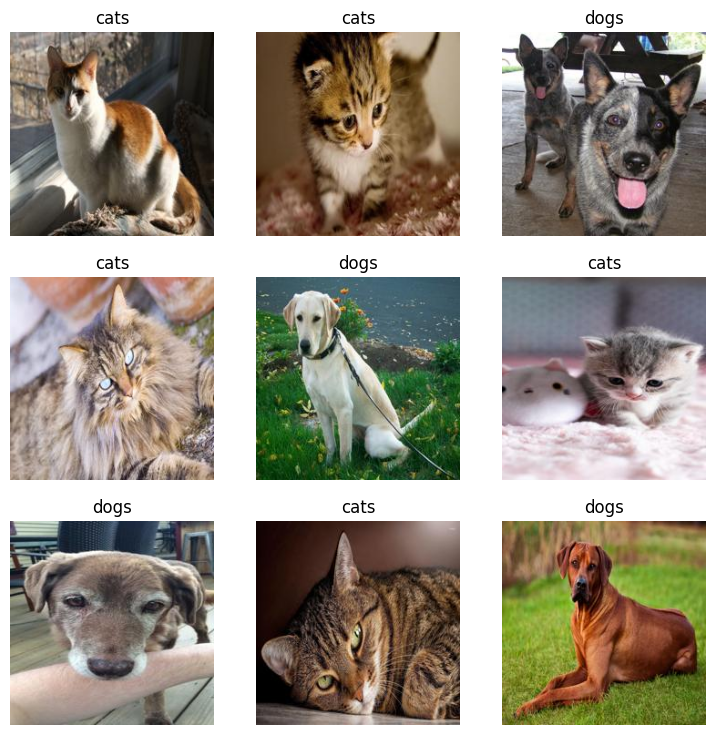

In [74]:
dls.show_batch()



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0008317637839354575)

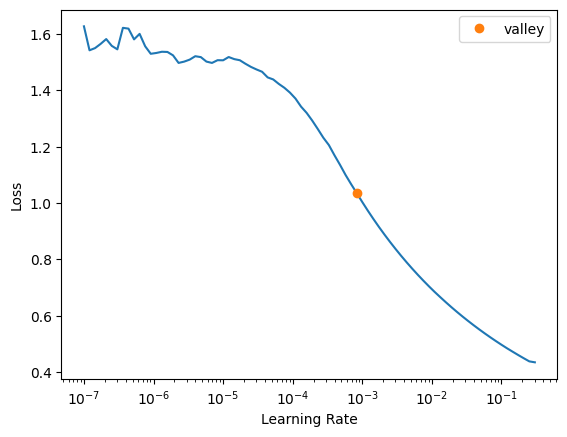

In [75]:
learn=vision_learner(dls, resnet34, metrics=error_rate)

learn.lr_find()

In [78]:
learn.fine_tune(5, 0.0008317637839354575)


epoch,train_loss,valid_loss,error_rate,time
0,0.008400,0.061266,0.031250,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.001139,0.046307,0.000000,00:01
1,0.003013,0.033183,0.000000,00:01
2,0.002131,0.025429,0.000000,00:01
3,0.001945,0.026022,0.000000,00:01
4,0.001718,0.029350,0.000000,00:01


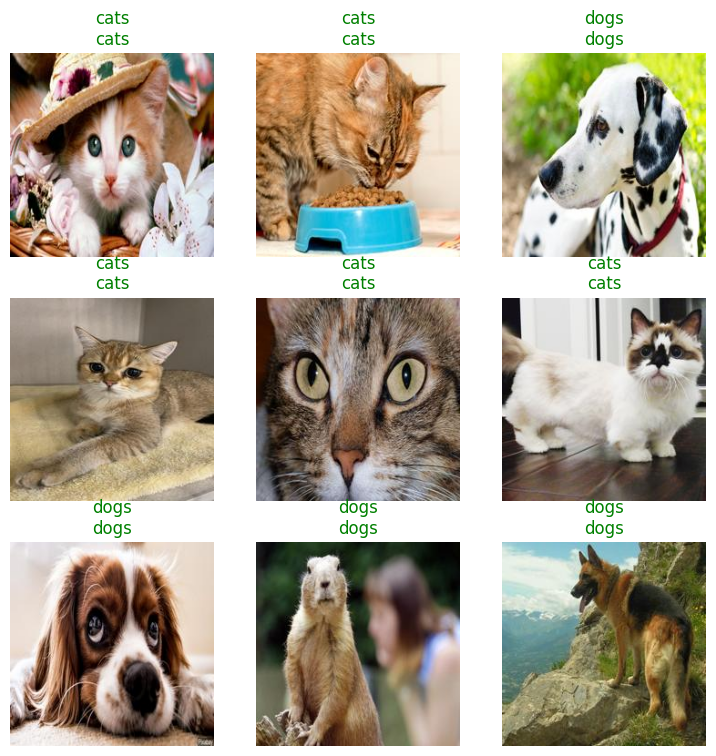

In [79]:
learn.show_results()
